## Прогнозирования вероятности покупки
Оригинальный датасет https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1

На его примере рассматривается анализ клиентской базыдля поиска идеальных клиентов и прогнозирования вероятности покупки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Читаем файл
df=pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Исследуем данные

Описание полей:
- 'Year_Birth' дата рождения
- 'Education' образование
- 'Marital_Status' семейный статус
- 'Income' годовой доход семьи
- 'Dt_Customer' дата регистрации клиента на сайте компании 
- 'Recency' количество дней с момента последней покупки
- 'NumWebVisitsMonth' количество визитов на сайт в месяц
- 'Complain' наличие жалоб
- 'Response' отклик на предложение (1 - если принял)
- 'Total_Engaged_Days' сколько всего дней вовлечен в коммуникацию
- 'Age' - лет с момента регистрации


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


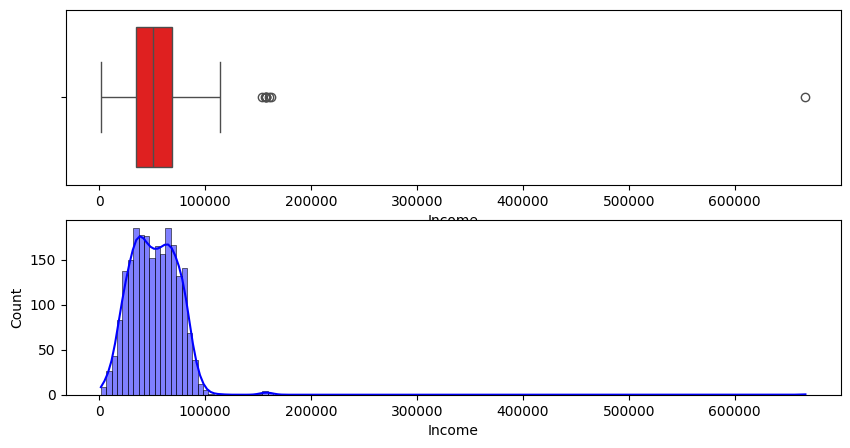

In [7]:
# График, визуализирует распределение данных.
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = df, x = 'Income', color = 'red', ax = axes[0])
sns.histplot(data = df, x = 'Income', kde=True, color='blue', ax = axes[1])

plt.show()

In [4]:
# Убираем выбросы.
df=df[df['Income']<120000]
df=df[df['NumWebVisitsMonth']<13]
df=df[df['Year_Birth']>1940]

In [5]:
# Показывает количество уникальных значений.
df.nunique()

ID                     2195
Year_Birth               55
Education                 5
Marital_Status            8
Income                 1953
Kidhome                   3
Teenhome                  3
Dt_Customer             660
Recency                 100
MntWines                774
MntFruits               158
MntMeatProducts         551
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            211
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      13
NumStorePurchases        14
NumWebVisitsMonth        11
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
# Частота встречаемости значения.
df['Marital_Status'].value_counts()

Marital_Status
Married     852
Together    566
Single      466
Divorced    228
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [7]:
# Кодирование переменных.
voc_status={'Single':0, 'Together':1, 'Married':2, 'Divorced':3, 'Widow':3, 'Alone':3, 'Absurd':4, 'YOLO':4}
voc_ed={'Basic':0, 'Graduation':1, 'Master':2, '2n Cycle':3, 'PhD':4}
df['Marital_Status_Code']=df['Marital_Status'].map(voc_status)
df['Education_Code']=df['Education'].map(voc_ed)

In [8]:
df[['Income', 'Year_Birth',  'Recency', 'NumWebVisitsMonth', 'Response',
        'Education_Code', 'Marital_Status_Code', 'Complain']]

,Income,Year_Birth,Recency,NumWebVisitsMonth,Response,Education_Code,Marital_Status_Code,Complain
0,58138.0,1957,58,7,1,1,0,0
1,46344.0,1954,38,5,0,1,0,0
2,71613.0,1965,26,4,0,1,1,0
3,26646.0,1984,26,6,0,1,1,0
4,58293.0,1981,94,5,0,4,2,0
...,...,...,...,...,...,...,...,...
2235,61223.0,1967,46,5,0,1,2,0
2236,64014.0,1946,56,7,0,4,1,0
2237,56981.0,1981,91,6,0,1,3,0
2238,69245.0,1956,8,3,0,2,1,0


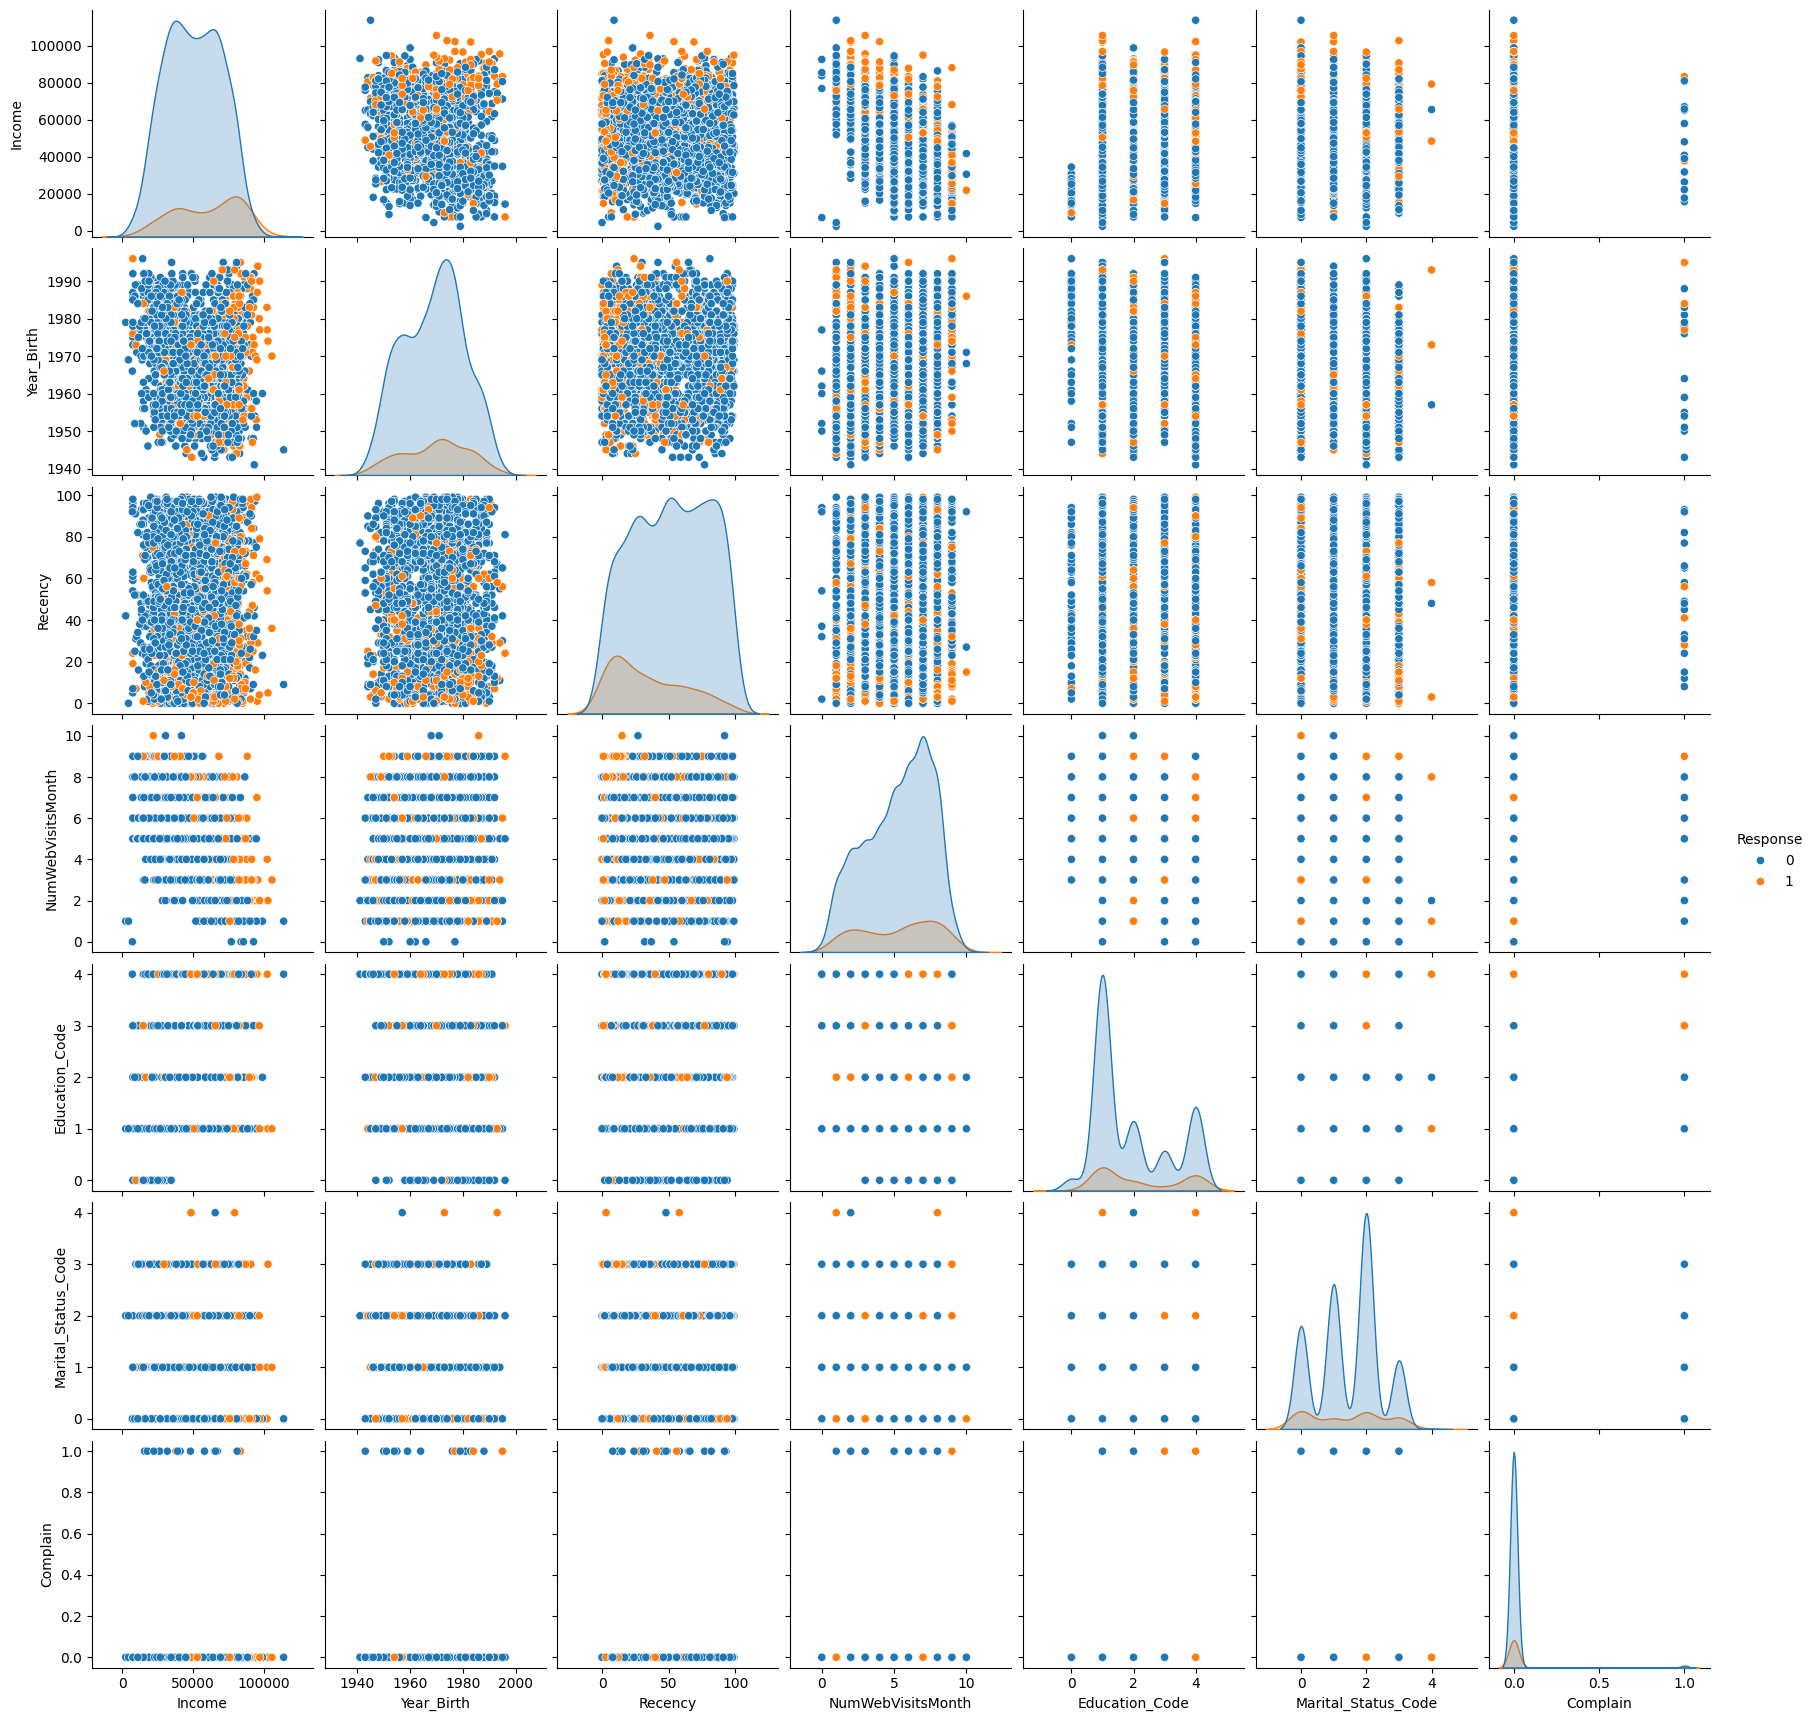

In [9]:
# Визуализация переменных.
to_plot = ['Income', 'Year_Birth',  'Recency', 'NumWebVisitsMonth', 'Response',
        'Education_Code', 'Marital_Status_Code', 'Complain']

sns.pairplot(df[to_plot], hue = 'Response')
plt.show()

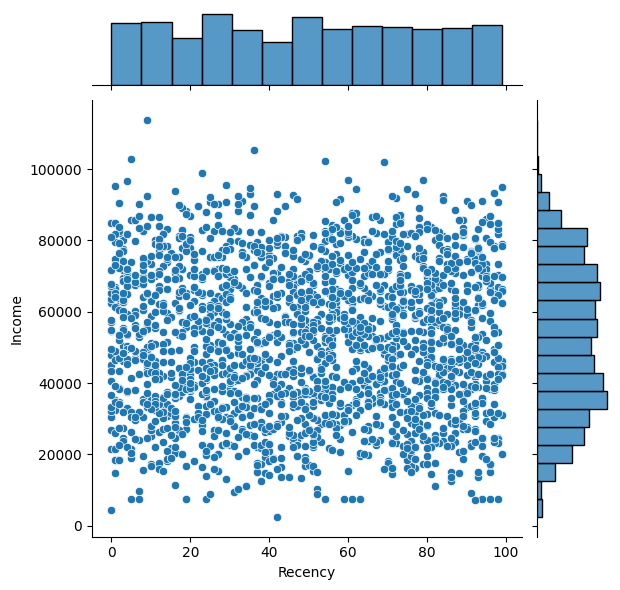

In [15]:
# Укрупненный график рассенияния.
sns.jointplot(x='Recency', y='Income', data=df, kind='scatter');

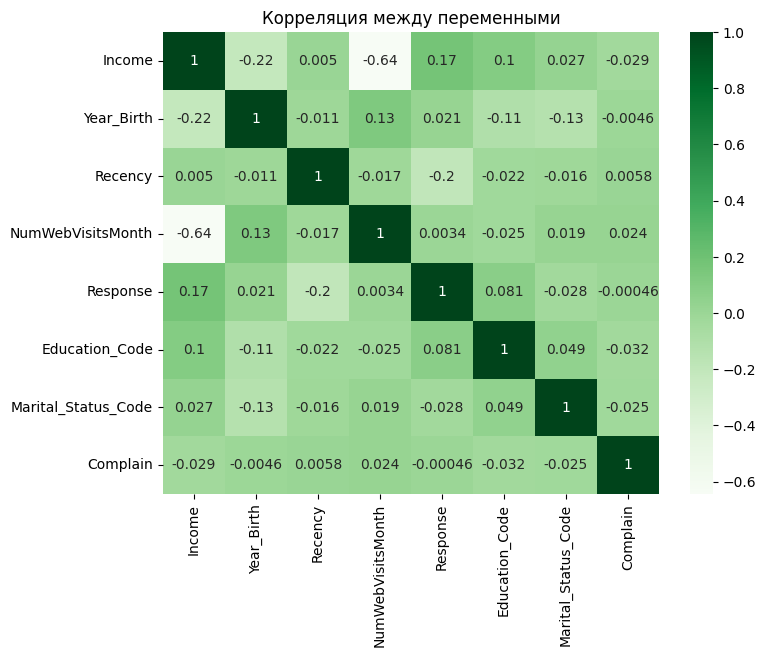

In [20]:
# Тепловая карта корреляции.
fig = plt.figure(figsize=(8,6))
plt.title('Корреляция между переменными')
sns.heatmap(df[['Income', 'Year_Birth',  'Recency', 'NumWebVisitsMonth', 'Response',
        'Education_Code', 'Marital_Status_Code', 'Complain']].corr(), annot=True, cmap="Greens");

In [10]:
# Кластеризация

from sklearn.cluster import KMeans
from sklearn import preprocessing
col=['Income', 'Education_Code', 'Marital_Status_Code']

X=df[df['Response']==1][col].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


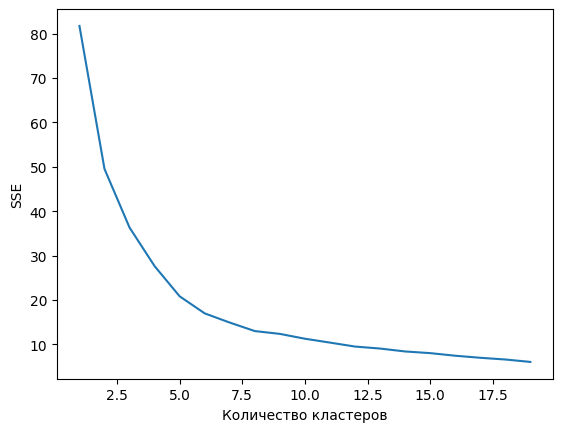

In [11]:
# Метод локтя.
import warnings
warnings.filterwarnings("ignore")
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

In [33]:
# Формирование таблицы с результатами.
kmeans = KMeans(n_clusters = 5).fit(X)
y_kmeans = kmeans.predict(X)
df_result=df[df['Response']==1][col].copy()
df_result['kmeans']=kmeans.labels_
df_result.sample(10)

,Income,Education_Code,Marital_Status_Code,kmeans
962,41021.0,2,1,2
2167,91172.0,2,0,1
1089,71691.0,4,0,4
1111,81698.0,3,0,4
205,18890.0,2,0,2
336,75693.0,1,3,3
203,102160.0,4,1,4
966,92955.0,1,2,3
1881,30396.0,4,2,0
1005,36130.0,1,0,2


In [31]:
# Групировка результатов вокруг кластеров. 
df_analize=df_result.groupby('kmeans')[col].mean()
df_analize['Count']=df_result.groupby('kmeans')['kmeans'].count()
df_analize

,Income,Education_Code,Marital_Status_Code,Count
kmeans,,,,
0,32025.346154,1.358974,0.974359,78
1,62757.673469,3.857143,0.265306,49
2,79432.777778,1.206349,0.333333,63
3,70644.493151,1.287671,2.493151,73
4,61648.657143,3.842857,2.471429,70


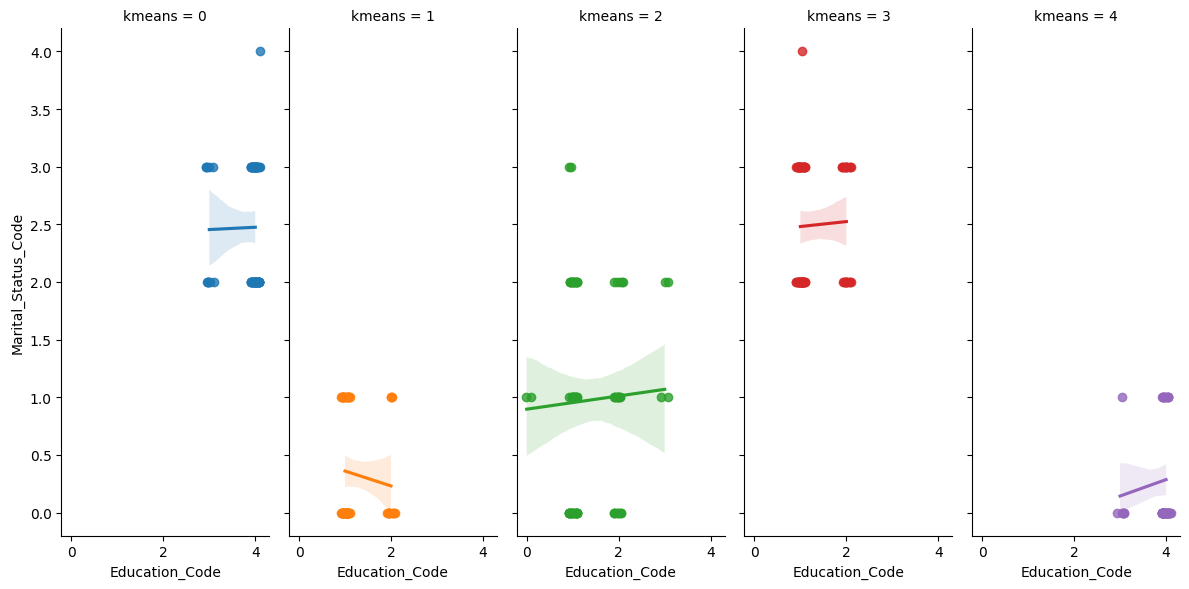

In [34]:
# Визуализация результатов.
x=col[1] #Изменяйте столбцы 
y=col[2]
g = sns.lmplot(x=x, y=y, hue="kmeans", col="kmeans",
               data=df_result, height=6, aspect=.4, x_jitter=.1)

## Предсказание

### Классификация

In [36]:
# Подготовка данных.

from sklearn import preprocessing

Y=df['Response'].values
col2=['Year_Birth', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 
      'Marital_Status_Code', 'Education_Code']

X = preprocessing.MinMaxScaler().fit_transform(df[col2])

from sklearn.model_selection import train_test_split
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
# Классификация.
from sklearn.ensemble import RandomForestClassifier
#feature extraction
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(model.predict(X_train), y_train))
print(r2_score(model.predict(X_test), y_test))

0.829696887090179
-0.6133350833442706


In [38]:
# Матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test)), columns=[0,1], index=[0,1])

,0,1
0,365,20
1,36,18


### Регрессия

In [40]:
# Подготовка данных.

Y=df['Income'].values
col2=['Year_Birth', 'Recency', 'NumWebVisitsMonth', 'Complain', 
      'Marital_Status_Code', 'Education_Code', 'Response']

X = preprocessing.MinMaxScaler().fit_transform(df[col2])

from sklearn.model_selection import train_test_split
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


0.8745808934618783
-0.1144725703230336


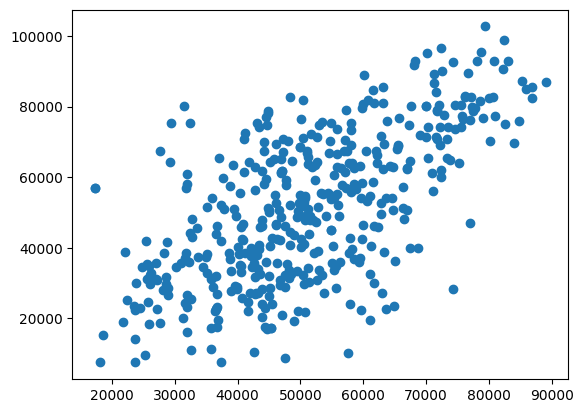

In [41]:
# Выполняем регрессию.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(model.predict(X_train), y_train))
print(r2_score(model.predict(X_test), y_test))

plt.plot(model.predict(X_test), y_test, 'o');
